In [1]:
import os
import csv
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn
import scipy

In [2]:
df = pd.read_csv("CCFraud Dataset/creditcard.csv")

In [3]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.shape)

(284807, 31)


In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
fraud = df[df["Class"] == 1]
valid = df[df["Class"] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print("Fraud cases : {}".format(len(df[df["Class"] == 1])))
print("Authentic transcations : {}".format(len(df[df["Class"] == 0])))

0.0017304750013189597
Fraud cases : 492
Authentic transcations : 284315


In [8]:
print("Details of fraud transactions : ")
print(fraud.Amount.describe())

Details of fraud transactions : 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
print("Details of authentic transactions : ")
print(valid.Amount.describe())

Details of authentic transactions : 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDepreca

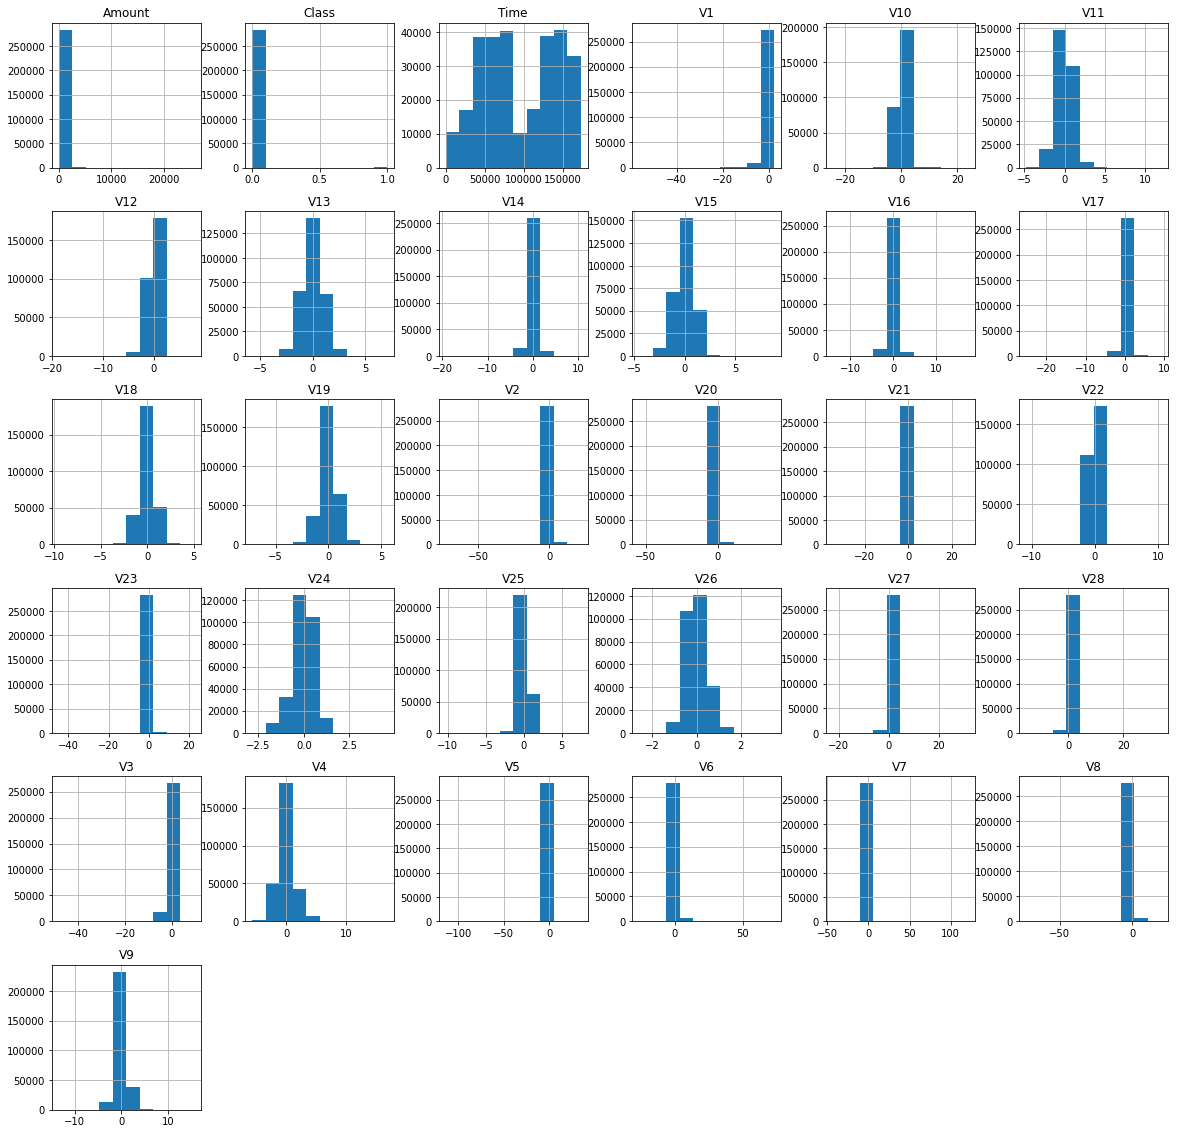

In [10]:
df.hist(figsize = (20,20))
plt.show()

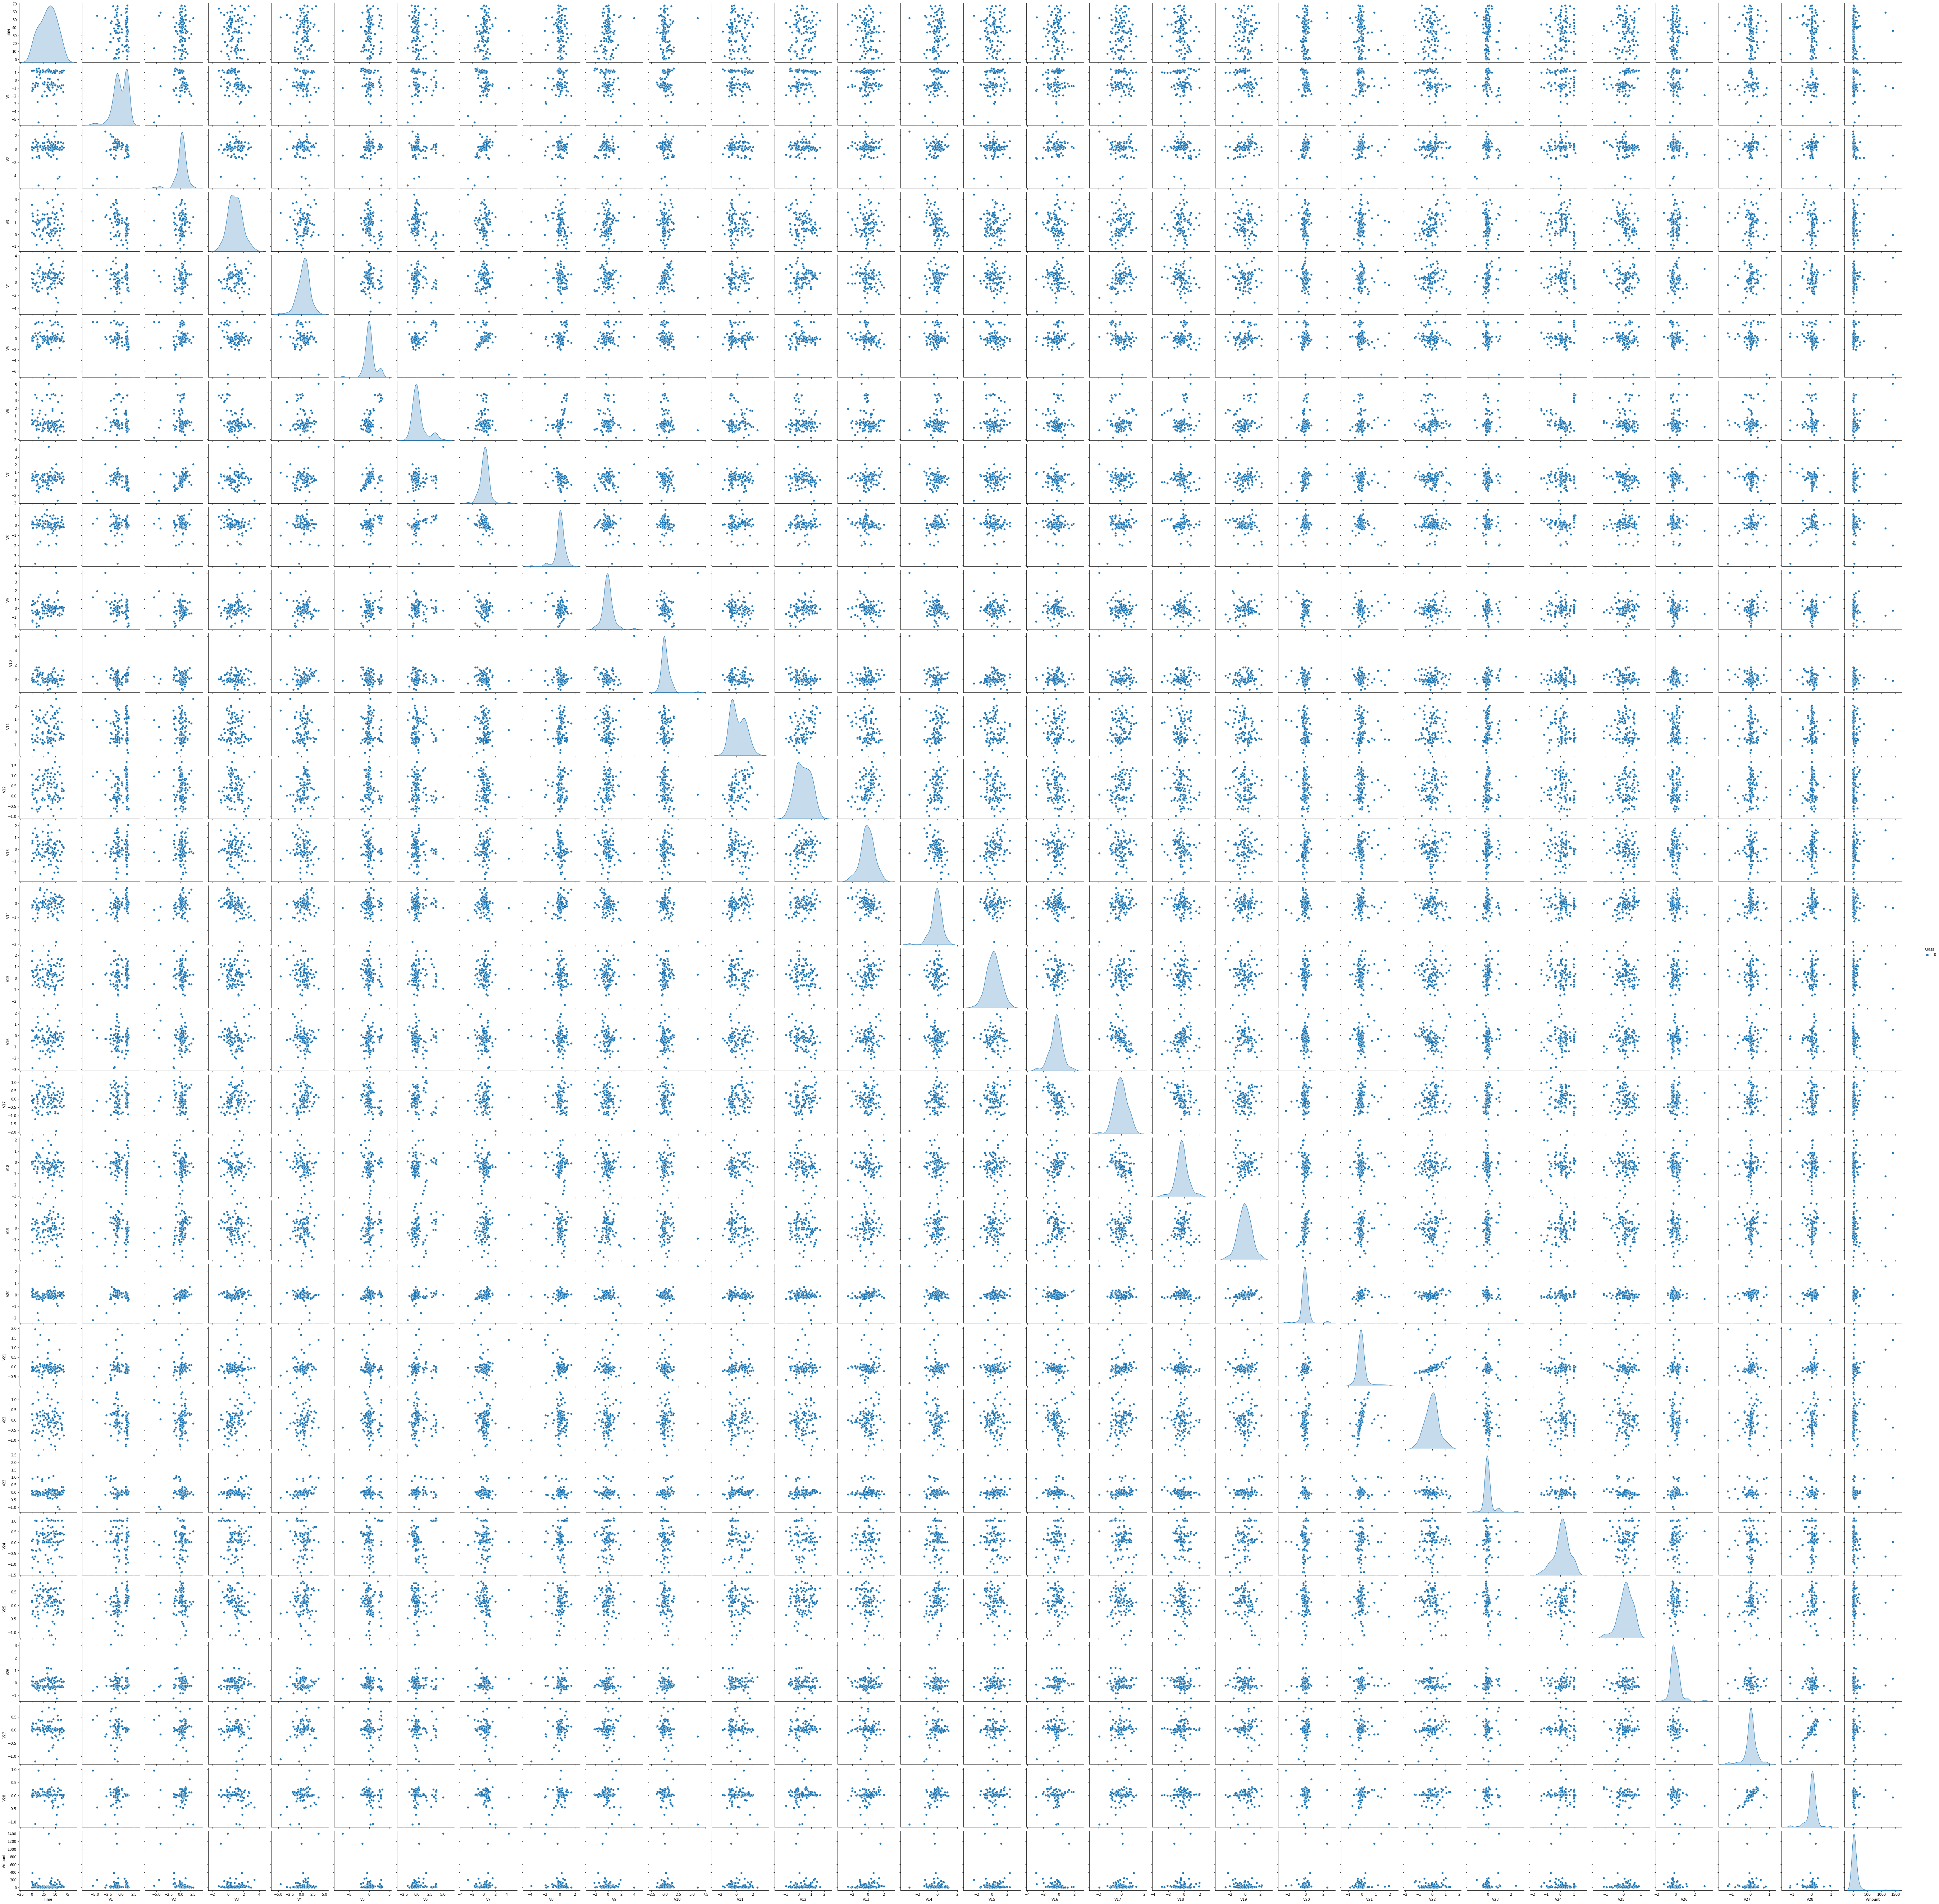

In [12]:
sb.pairplot(df.head(100), hue = 'Class')

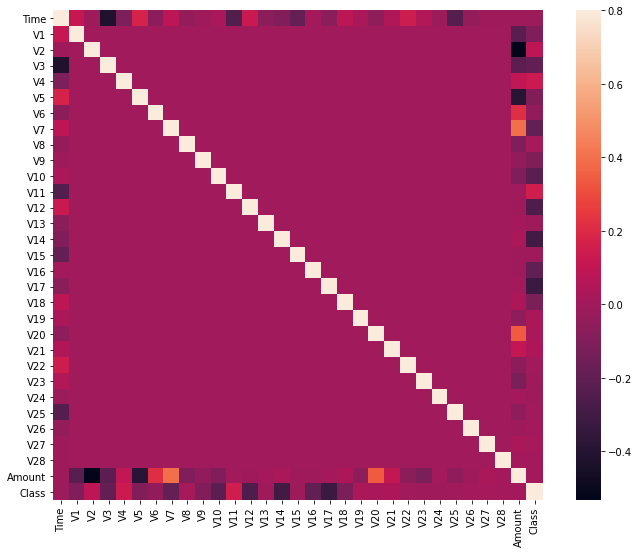

In [15]:
crr = df.corr()
fig = plt.figure(figsize = (12,9))
sb.heatmap(crr, vmax = 0.8, square = True)
plt.show()

In [16]:
data = df.sample(frac = 0.2, random_state = 1)
print(data)

            Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
196117  131364.0  0.077197  0.482928 -2.234233 -1.309124  2.386570  3.392581   
24533    33274.0 -0.958584  1.109086  1.558159  0.878707  1.914559  1.564757   
13629    24158.0 -0.992899  1.430204  1.071256  1.363127  0.116315  0.217868   
246673  153276.0 -1.143693 -0.250983  1.013022 -0.671080  1.363438  0.312673   
91842    63649.0  0.555043 -0.099484 -0.102234 -0.624145  1.484364  4.154536   
33014    37056.0  0.884282 -0.973495  0.929080  0.397955 -1.463564 -0.351713   
14195    25229.0  1.443703 -0.377190 -0.

In [17]:
columns = data.columns.tolist()
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [18]:
columns = [c for c in columns if c not in ["Class"]]
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [19]:
target = "Class"

In [54]:
X = data[columns]
Y = data[target]
print(X.shape, Y.shape)

(56961, 30) (56961,)


In [46]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as LR

In [77]:
state = 1 

classifiers = { 'Isolation Forest' : IsolationForest(max_samples = len(X),
                                                      contamination = outlierFraction,
                                                      random_state = state),
                  'Local Outlier Factor' : LocalOutlierFactor(n_neighbors = 20,
                                                             contamination = outlierFraction),
                  'Knn' : KNeighborsClassifier(n_neighbors=2, 
                            weights='uniform', 
                             algorithm='auto', 
                            leaf_size=30, 
                            p=2),
                  'LR' : LogisticRegression(penalty='l2',
                                            dual=False, 
                                            tol=0.0001, 
                                            C=1.0, 
                                            fit_intercept=True, 
                                            intercept_scaling=1, 
                                            class_weight=None, 
                                            random_state=1, 
                                            solver='lbfgs', 
                                            max_iter=100, 
                                            multi_class='auto', 
                                            verbose=0, 
                                            warm_start=False, 
                                            n_jobs=None)}

In [79]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name == 'Knn':
        clf.fit(X, Y)
        scores_pred = clf.score(X, Y)
        y_pred = clf.predict(X)
    elif clf_name == 'LR':
        clf.fit(X,Y)
        scores_pred = clf.score(X, Y)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors= (y_pred != Y).sum()
    
    
    print('{} : {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest : 136
0.9976124014676708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.25      0.29      0.27        87

    accuracy                           1.00     56961
   macro avg       0.63      0.64      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor : 182
0.9968048313758536
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.02      0.02      0.02        87

    accuracy                           1.00     56961
   macro avg       0.51      0.51      0.51     56961
weighted avg       1.00      1.00      1.00     56961

Knn : 87
0.9984726391741718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.00      0.00      0.00        87

    accuracy                           1.00     56961
   macro avg

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR : 87
0.9984726391741718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.00      0.00      0.00        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [49]:
test_data = df.sample(frac = 0.2, random_state = 2)
test_data.head()

X_test = test_data[columns]
Y_test = test_data[target]
print(X_test.shape, Y_test.shape)

(56961, 30) (56961,)


In [80]:
#n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X_test)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name == 'Knn':
        #clf.fit(X, Y)
        y_pred = clf.predict(X_test)
    elif clf_name == 'LR':
        scores_pred = clf.score(X, Y)
        y_pred = clf.predict(X)
    else:
        #clf.fit(X)
        scores_pred = clf.decision_function(X_test)
        y_pred = clf.predict(X_test)
        
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors= (y_pred != Y).sum()
    
    
    print('{} : {}'.format(clf_name, n_errors))
    print(accuracy_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))

Isolation Forest : 184
0.997910851284212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.32      0.37      0.34        84

    accuracy                           1.00     56961
   macro avg       0.66      0.68      0.67     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor : 186
0.9967872755042924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        84

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Knn : 87
0.9985253067888555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        84

    accuracy                           1.00     56961
   macro avg 

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metr